# Load libraries

In [6]:
from data_utils import load_data,flatten_data
from early_model import stacked_lstm
from model_utils import model_pipeline,plot_history
import numpy as np
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define participant numbers

In [7]:
train_participant_num = ["C56D","C93D","C382D","C382N","C544D","C709N","C788N","P113D","P113N","P191D","P191N","P299D","P299N","P300D","P336D","P492D","P492N","P531N","P699D","P699N","P890N","P921D","P921N"]
valid_participant_num = ["C67D","C202D","C202N","C256D","C256N","P54D","P54N","P342D","P342N","P487D","P487N","P649N"]

# Load Coordinate data

In [41]:
X_train, y_train = load_data(train_participant_num, 'train', downsampling=True,angle_energy=False,augment=False)
X_valid, y_valid = load_data(valid_participant_num, 'validation')

# Print shape of data

In [42]:
print(X_train.shape,np.unique(y_train[:,0],return_counts=True))

print(X_valid.shape,np.unique(y_valid[:,0],return_counts=True))

(5012, 180, 70) (array([0., 1.], dtype=float32), array([1053, 3959]))
(2869, 180, 70) (array([0., 1.], dtype=float32), array([ 171, 2698]))


# Build Stacked-Deep-LSTM-Coordinate model

/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/50
11/11 [==============================] - 19s 2s/step - loss: 0.2187 - binary_accuracy: 0.4792 - val_loss: 0.1374 - val_binary_accuracy: 0.8728 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/50
11/11 [==============================] - 7s 621ms/step - loss: 0.1789 - binary_accuracy: 0.5934 - val_loss: 0.1152 - val_binary_accuracy: 0.9376 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/50
11/11 [==============================] - 11s 1s/step - loss: 0.1637 - binary_accuracy: 0.6658 - val_loss: 0.1015 - val_binary_accuracy: 0.9400 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/50
11/11 [==============================] - 10s 947ms/step - loss: 0.1564 - binary_accuracy: 0.6935 - val_loss: 0.0952 - val_binary_accuracy: 0.9404 - lr: 5.

/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2698
           1       0.00      0.00      0.00       171

    accuracy                           0.94      2869
   macro avg       0.47      0.50      0.48      2869
weighted avg       0.88      0.94      0.91      2869

Confusion matrix:
[[2698    0]
 [ 171    0]]


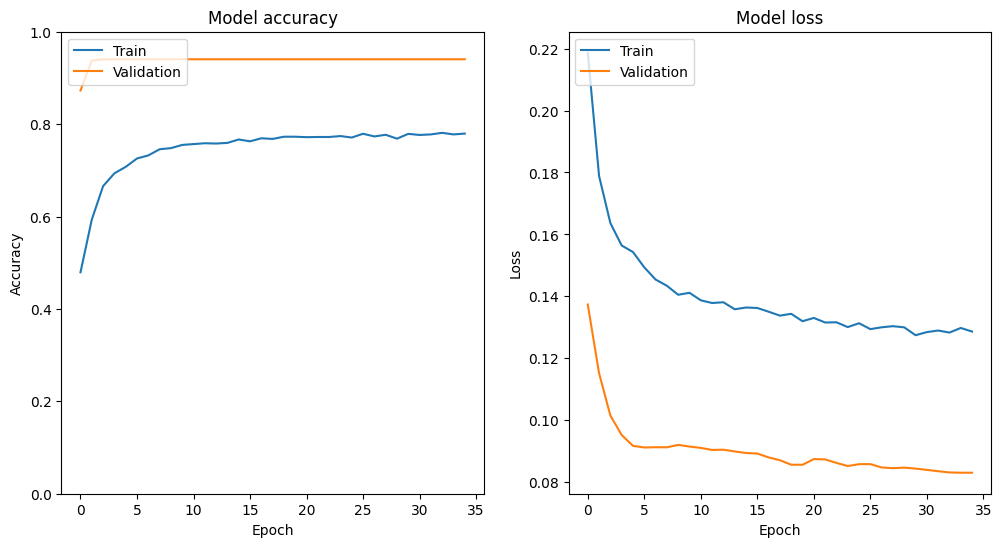

In [43]:
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train.shape[1]
model = stacked_lstm(input_shape,num_classes)
y_pred, y_true, H = model_pipeline(model, X_train, y_train, X_valid, y_valid)
plot_history(H)

# Load Angle data

In [8]:
X_train_angle, y_train_angle = load_data(train_participant_num, 'train', downsampling=True, angle_energy=True,data_path='../AllData/')
X_valid_angle, y_valid_angle = load_data(valid_participant_num, 'validation', angle_energy=True,data_path='../AllData/')

C56D is not selected to be used for training (downsampling)
C93D is not selected to be used for training (downsampling)
C382D is not selected to be used for training (downsampling)
C382N is not selected to be used for training (downsampling)
C544D is not selected to be used for training (downsampling)
C709N is not selected to be used for training (downsampling)
C788N is not selected to be used for training (downsampling)
P113D is selected to be used for training (downsampling)
P113N is selected to be used for training (downsampling)
P191D is selected to be used for training (downsampling)
P191N is selected to be used for training (downsampling)
P299D is selected to be used for training (downsampling)
P299N is selected to be used for training (downsampling)
P300D is selected to be used for training (downsampling)
P336D is selected to be used for training (downsampling)
P492D is selected to be used for training (downsampling)
P492N is selected to be used for training (downsampling)
P531N

# Print shape of data

In [9]:
print(X_train_angle.shape,np.unique(y_train_angle[:,0],return_counts=True))

print(X_valid_angle.shape,np.unique(y_valid_angle[:,0],return_counts=True))

(5012, 180, 30) (array([0., 1.], dtype=float32), array([1053, 3959]))
(2869, 180, 30) (array([0., 1.], dtype=float32), array([ 171, 2698]))


# Build Stacked-Deep-LSTM-Angle model


Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/50


/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


11/11 [==============================] - 6s 340ms/step - loss: 0.1696 - binary_accuracy: 0.6225 - val_loss: 0.1092 - val_binary_accuracy: 0.9143 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/50
11/11 [==============================] - 4s 341ms/step - loss: 0.1449 - binary_accuracy: 0.7504 - val_loss: 0.0983 - val_binary_accuracy: 0.9157 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/50
11/11 [==============================] - 4s 329ms/step - loss: 0.1409 - binary_accuracy: 0.7678 - val_loss: 0.0988 - val_binary_accuracy: 0.9146 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/50
11/11 [==============================] - 3s 309ms/step - loss: 0.1381 - binary_accuracy: 0.7723 - val_loss: 0.1014 - val_binary_accuracy: 0.9136 - lr: 5.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0005000000237487257.

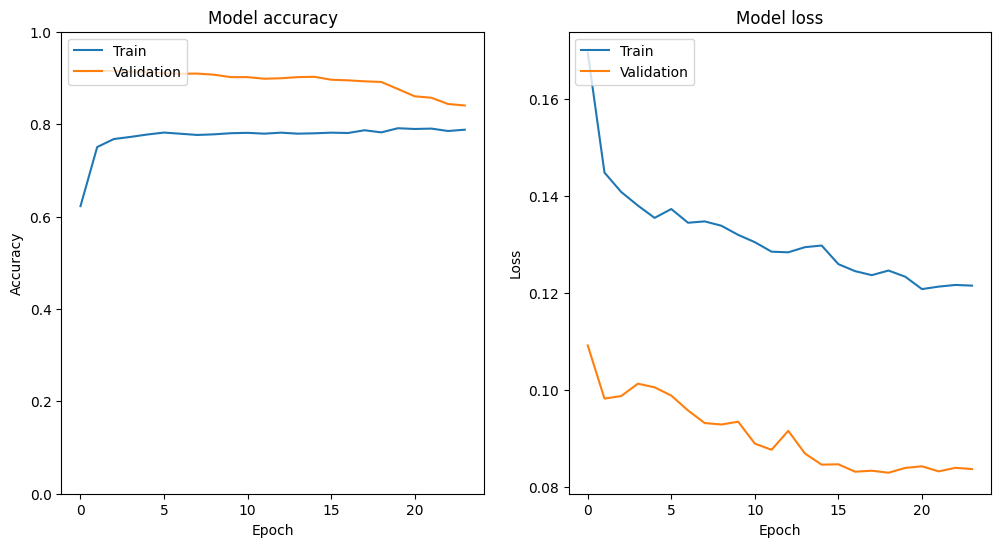

In [10]:
input_shape = (X_train_angle.shape[1], X_train_angle.shape[2])
num_classes = y_train_angle.shape[1]
model = stacked_lstm(input_shape,num_classes)
y_pred, y_true, H = model_pipeline(model, X_train_angle, y_train_angle, X_valid_angle, y_valid_angle)
plot_history(H)

# Flatten data for Random Forest and AdaBoost

In [47]:
X_train_flatten,y_train_flatten = flatten_data(X_train,y_train)
X_valid_flatten,y_valid_flatten = flatten_data(X_valid,y_valid)

# Print shape of data

In [48]:
print(X_train_flatten.shape,np.unique(y_train_flatten[:],return_counts=True))

print(X_valid_flatten.shape,np.unique(y_valid_flatten[:],return_counts=True))

(5012, 12600) (array([0, 1]), array([3959, 1053]))
(2869, 12600) (array([0, 1]), array([2698,  171]))


# Build Random Forest and AdaBoost model

In [49]:
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

rf.fit(X_train_flatten,y_train_flatten)
ada.fit(X_train_flatten,y_train_flatten)

AdaBoostClassifier()

# Print classification report and confusion matrix for Random Forest and AdaBoost model

In [50]:
rf_pred = rf.predict(X_valid_flatten)
ada_pred = ada.predict(X_valid_flatten)

In [51]:
print(classification_report(y_valid_flatten,rf_pred))
print(confusion_matrix(y_valid_flatten,rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2698
           1       0.08      0.28      0.12       171

    accuracy                           0.76      2869
   macro avg       0.51      0.54      0.49      2869
weighted avg       0.89      0.76      0.82      2869

[[2131  567]
 [ 123   48]]


In [52]:
print(classification_report(y_valid_flatten,ada_pred))
print(confusion_matrix(y_valid_flatten,ada_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2698
           1       0.20      0.22      0.21       171

    accuracy                           0.90      2869
   macro avg       0.58      0.58      0.58      2869
weighted avg       0.91      0.90      0.90      2869

[[2553  145]
 [ 134   37]]
